# Present the symbolic derivation of existing models

In [1]:
%matplotlib inline
import os, importlib, inspect
from IPython.display import display, Math, Latex, Markdown
from bmcs_matmod.gsm_lagrange.core.gsm_def import GSMDef, sp
from bmcs_matmod.gsm_lagrange.core.gsm_model import GSMModel
from bmcs_matmod.gsm_lagrange.core.gsm_def_registry import list_gsm_defs
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import the GSM definition registry  
from bmcs_matmod.gsm_lagrange.core.gsm_def_registry import get_gsm_defs

gsm_defs = get_gsm_defs()
gsm_models = {key: GSMModel(gsm_def_class) for key, gsm_def_class in gsm_defs.items() if key.startswith('GSM1D_')}

# Display available GSM definitions
print("Available GSM Definitions:")
print("=" * 50)
for i, (key, gsm_def_class) in enumerate(gsm_defs.items(), 1):
    if key.startswith('GSM1D_'):  # Show only full class names
        print(f"{i:2d}. {key} -> {gsm_def_class}")

print(f"\nTotal access keys: {len(gsm_defs)}")
print(f"Unique definitions: {len(set(gsm_defs.values()))}")

Available GSM Definitions:
 1. GSM1D_VEVPD -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_vevpd.GSM1D_VEVPD'>
 2. GSM1D_EP -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_ep.GSM1D_EP'>
 3. GSM1D_VE -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_ve.GSM1D_VE'>
 4. GSM1D_ED -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_ed.GSM1D_ED'>
 5. GSM1D_EPD -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_epd.GSM1D_EPD'>
 6. GSM1D_EVP -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_evp.GSM1D_EVP'>
 7. GSM1D_EVPD -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_evpd.GSM1D_EVPD'>
 8. GSM1D_VEVP -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_vevp.GSM1D_VEVP'>
 9. GSM1D_VED -> <class 'bmcs_matmod.gsm_lagrange.models.gsm1d_ved.GSM1D_VED'>

Total access keys: 9
Unique definitions: 9


In [3]:
mparams = dict(E = 20, K = 5, S = 2, c = 1, r = 1, eps_0 = 0, f_c = 15, eta_vp=10, eta_ve=100)

In [4]:
n_t = 151
n_I = 1
eps_max = 2.5
final_time = 10
t_t = np.linspace(0, final_time, n_t)
eps_n_t = np.linspace(0, eps_max, n_t)
response = {}
selection = [] # ['GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_F_response(eps_n_t, t_t)

name: GSM1D_VEVPD
name: GSM1D_EP
name: GSM1D_EP
name: GSM1D_VE
name: GSM1D_VE
name: GSM1D_ED
name: GSM1D_ED
name: GSM1D_EPD
name: GSM1D_EPD
name: GSM1D_EVP
name: GSM1D_EVP
name: GSM1D_EVPD
name: GSM1D_EVPD
name: GSM1D_VEVP
name: GSM1D_VEVP
name: GSM1D_VED
name: GSM1D_VED


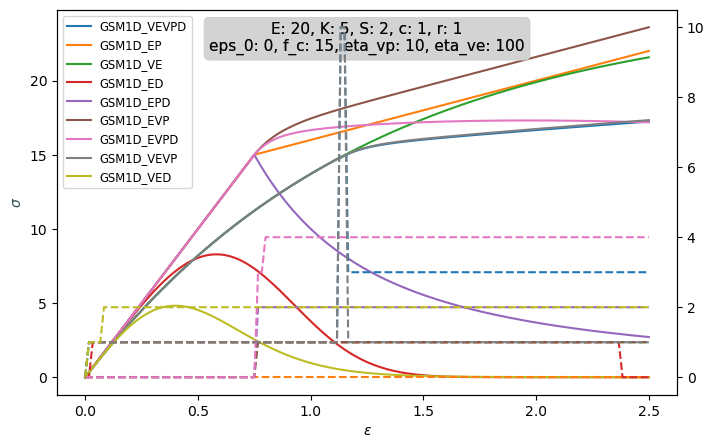

In [5]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')


In [6]:
mparams = dict(E = 20, K = 10, S = .2, c = 1, r = 1, eps_0 = 0, f_c = 7, eta_vp=10, eta_ve=10)

n_t = 151
n_I = 1
sig_max = 16
final_time = 30
t_t = np.linspace(0, final_time, n_t)
sig_n_t = np.linspace(0, sig_max, n_t)
response = {}
selection = ['GSM1D_EVPD', 'GSM1D_VEVP', 'GSM1D_VEVPD']
if len(selection) == 0:
    selection = gsm_models.keys()
for name in selection:
    gsm = gsm_models[name]
    gsm.set_params(**mparams)
    print(f'name: {name}')
    response[name] = gsm.get_G_response(sig_n_t, t_t)

name: GSM1D_EVPD
name: GSM1D_VEVP
name: GSM1D_VEVP
name: GSM1D_VEVPD
name: GSM1D_VEVPD


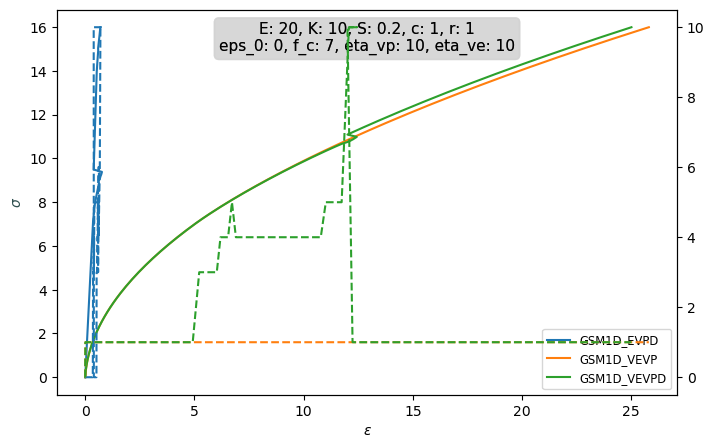

In [7]:
fig, ax_sig = plt.subplots(1, 1, figsize=(8, 5))

ax_iter = ax_sig.twinx()

for name, rd in response.items():
    eps_t = rd.eps_t[:, 0]
    iter_t = rd.iter_t[:, 0]
    sig_t = rd.sig_t[:, 0]
    ax_sig.plot(eps_t, sig_t, label=rf'{name}')
    ax_iter.plot(eps_t, iter_t, label=rf'{name}', ls='dashed')
    # Add a box with the material parameters
    param_text = ', '.join([f'{key}: {value}' for key, value in mparams.items()])
    param_text = '\n'.join([', '.join(param_text.split(', ')[i:i+5]) for i in range(0, len(param_text.split(', ')), 5)])
    props = dict(boxstyle='round', facecolor='lightgray', edgecolor='lightgray', alpha=0.5)
    ax_sig.text(0.5, 0.97, param_text, transform=ax_sig.transAxes, fontsize=11,
                verticalalignment='top', horizontalalignment='center', bbox=props)
ax_sig.set_ylabel(r'$\sigma$', color='darkslategray')
ax_sig.set_xlabel(r'$\varepsilon$')
ax_sig.legend(fontsize='small')


In [8]:
# Check package versions to diagnose the ipympl compatibility issue
import matplotlib
import ipympl
import IPython
import jupyter_core

print("Package Versions:")
print("=" * 50)
print(f"matplotlib: {matplotlib.__version__}")
print(f"ipympl: {ipympl.__version__}")
print(f"IPython: {IPython.__version__}")
print(f"jupyter_core: {jupyter_core.__version__}")

# Check Python version
import sys
print(f"Python: {sys.version}")

# Check matplotlib backend
print(f"\nMatplotlib backend: {matplotlib.get_backend()}")

# Try to check if there are known compatibility issues
print("\nKnown compatibility issues:")
print("- ipympl 0.9.6 has known issues with Python 3.13")
print("- matplotlib 3.10.0 may have compatibility issues with older ipympl versions")

Package Versions:
matplotlib: 3.10.0
ipympl: 0.9.7
IPython: 8.34.0
jupyter_core: 5.7.2
Python: 3.13.2 | packaged by Anaconda, Inc. | (main, Feb  6 2025, 18:56:02) [GCC 11.2.0]

Matplotlib backend: module://ipympl.backend_nbagg

Known compatibility issues:
- ipympl 0.9.6 has known issues with Python 3.13
- matplotlib 3.10.0 may have compatibility issues with older ipympl versions


## Solutions for ipympl Compatibility Issue

The error `KeyError: 'buttons'` is caused by incompatibility between:
- **Python 3.13.2** and **ipympl 0.9.6**

### Recommended Solutions (choose one):

#### Option 1: Update ipympl (Recommended)
```bash
conda activate icc_env
conda update ipympl
# or
pip install --upgrade ipympl
```

#### Option 2: Use inline backend (Quick fix)
Replace `%matplotlib widget` with `%matplotlib inline` in the first cell. This disables interactive plots but eliminates the error.

#### Option 3: Downgrade Python
```bash
conda activate icc_env
conda install python=3.11
```

#### Option 4: Use static backend temporarily
Run the cell below to switch to a non-interactive backend:

In [ ]:
# Quick fix: Switch to inline backend to avoid ipympl issues
# Uncomment the line below to use static plots instead of interactive widgets
# %matplotlib inline

# To restore widget functionality after fixing ipympl, use:
# %matplotlib widget